<a href="https://colab.research.google.com/github/om-369/NLP-GEN-AI/blob/main/nlp04_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=e2e971275ed2ffcf2e3b758363305393afb181937637f877e80355492c92ea60
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=338d1007cb976f2bc83d1289631fc0c7738361f97faef0deec8088533f76b055
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from collections import Counter
l1 = [2,3,4,44,4,4,44,4,2,2,2,2]
count = Counter(l1)
# print(count)
count.most_common(1)[0][0]
count.most_common(2)[1][0]

4

In [ ]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [ ]:
data = pd.read_csv('dataset_es_train.csv')
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [ ]:
data.shape

(200000, 8)

In [ ]:
sample = data.sample(1000)
sample.reset_index(drop=True,inplace=True)

In [ ]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0299643,product_es_0718866,reviewer_es_0568368,1,No me gusta! A parte del tamaño que tiene lo p...,De pena el ruido que mete,es,pc
1,es_0754725,product_es_0354529,reviewer_es_0745054,3,"ES EXACTAMENTE IGUAL COMO SE VE EN LA FOTO, PE...",FUNDA TRANSPARENTE,es,wireless
2,es_0784946,product_es_0077423,reviewer_es_0998077,5,"Va de maravilla, tiene peso, así que se mantie...",Fantastica plancha,es,home
3,es_0244317,product_es_0693577,reviewer_es_0989762,1,"No lee la mitad de los vehiculos,y los que lee...",mala calidad,es,automotive
4,es_0789380,product_es_0913364,reviewer_es_0916490,4,Para usos esporádicos va genial para el precio...,Sergio SG,es,home_improvement
...,...,...,...,...,...,...,...,...
995,es_0437754,product_es_0546965,reviewer_es_0047946,1,"el estampado esta bien ,pero la camiseta es de...",muy mala calidad,es,apparel
996,es_0902334,product_es_0299268,reviewer_es_0293988,3,"Muy buen libro. Es práctico, da estrategias fa...",Carmen maria,es,book
997,es_0620118,product_es_0555486,reviewer_es_0007066,1,Pedí silicona color teja y cuando hemos abiert...,Mala,es,home_improvement
998,es_0166565,product_es_0826808,reviewer_es_0890597,4,Cumple con lo esperado,Correcto,es,home_improvement


In [ ]:
df = sample[['review_body','stars']]
df

,review_body,stars
0,No me gusta! A parte del tamaño que tiene lo p...,1
1,"ES EXACTAMENTE IGUAL COMO SE VE EN LA FOTO, PE...",3
2,"Va de maravilla, tiene peso, así que se mantie...",5
3,"No lee la mitad de los vehiculos,y los que lee...",1
4,Para usos esporádicos va genial para el precio...,4
...,...,...
995,"el estampado esta bien ,pero la camiseta es de...",1
996,"Muy buen libro. Es práctico, da estrategias fa...",3
997,Pedí silicona color teja y cuando hemos abiert...,1
998,Cumple con lo esperado,4


In [ ]:
#  language detection
def lang_detect(data):
  lang = detect(data)
  return lang

In [ ]:
print(df.review_body[0])
lang_detect(df.review_body[0])

No me gusta! A parte del tamaño que tiene lo peor de todo es el ruido, puedes estar viendo algo que sigues escuchando cada vez que das al botón, nunca he escuchado un ratón que suene algo. No lo devuelvo porque pierdo dinero, si no lo devolvía sin duda alguna.


'es'

In [ ]:
df['language'] = df.review_body.apply(lang_detect)
df

,review_body,stars,language
0,No me gusta! A parte del tamaño que tiene lo p...,1,es
1,"ES EXACTAMENTE IGUAL COMO SE VE EN LA FOTO, PE...",3,en
2,"Va de maravilla, tiene peso, así que se mantie...",5,es
3,"No lee la mitad de los vehiculos,y los que lee...",1,es
4,Para usos esporádicos va genial para el precio...,4,es
...,...,...,...
995,"el estampado esta bien ,pero la camiseta es de...",1,es
996,"Muy buen libro. Es práctico, da estrategias fa...",3,es
997,Pedí silicona color teja y cuando hemos abiert...,1,es
998,Cumple con lo esperado,4,es


In [ ]:
df.language.unique()

array(['es', 'en', 'pt', 'so', 'ca', 'it', 'de'], dtype=object)

In [ ]:
df.language.value_counts()

es    977
pt     10
it      4
en      3
ca      3
so      2
de      1
Name: language, dtype: int64

In [ ]:
# language translation
def lang_trans(data):
  translator = Translator()
  translated_text = translator.translate(data)
  return translated_text.text

In [ ]:
print(df.review_body[0])
lang_trans(df.review_body[0])

No me gusta! A parte del tamaño que tiene lo peor de todo es el ruido, puedes estar viendo algo que sigues escuchando cada vez que das al botón, nunca he escuchado un ratón que suene algo. No lo devuelvo porque pierdo dinero, si no lo devolvía sin duda alguna.


"I don't like! Apart from the size that has the worst of all is the noise, you may be seeing something that you keep hearing every time you press the button, I have never heard a mouse that sounds something. I do not return it because I lose money, if I did not return it without a doubt."

In [ ]:
df['translated_reviews'] = df.review_body.apply(lang_trans)
df

,review_body,stars,language,translated_reviews
0,No me gusta! A parte del tamaño que tiene lo p...,1,es,I don't like! Apart from the size that has the...
1,"ES EXACTAMENTE IGUAL COMO SE VE EN LA FOTO, PE...",3,en,IT IS EXACTLY THE SAME AS IT SEES IN THE PHOTO...
2,"Va de maravilla, tiene peso, así que se mantie...",5,es,"It works great, it has weight, so it stays in ..."
3,"No lee la mitad de los vehiculos,y los que lee...",1,es,"It does not read half of the vehicles, and tho..."
4,Para usos esporádicos va genial para el precio...,4,es,"For sporadic uses it is great for its price, a..."
...,...,...,...,...
995,"el estampado esta bien ,pero la camiseta es de...",1,es,"The print is fine, but the t-shirt is of very ..."
996,"Muy buen libro. Es práctico, da estrategias fa...",3,es,"Very good book. It is practical, gives feasibl..."
997,Pedí silicona color teja y cuando hemos abiert...,1,es,I asked for tile-colored silicone and when we ...
998,Cumple con lo esperado,4,es,meets expectations


In [ ]:
#  ngrams

def ngram_extractor(data, ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)
  ngram_list1 = []
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1

In [ ]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [I, do, n't, like, !, Apart, from, the, size, ...
1      [IT, IS, EXACTLY, THE, SAME, AS, IT, SEES, IN,...
2      [It, works, great, ,, it, has, weight, ,, so, ...
3      [It, does, not, read, half, of, the, vehicles,...
4      [For, sporadic, uses, it, is, great, for, its,...
                             ...                        
995    [The, print, is, fine, ,, but, the, t-shirt, i...
996    [Very, good, book, ., It, is, practical, ,, gi...
997    [I, asked, for, tile-colored, silicone, and, w...
998                                [meets, expectations]
999                         [very, interesting, article]
Name: translated_reviews, Length: 1000, dtype: object

In [ ]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('the', 1547),
 ('.', 1526),
 (',', 1434),
 ('it', 1387),
 ('and', 920),
 ('I', 887),
 ('is', 781),
 ('to', 730),
 ('a', 650),
 ('not', 491),
 ('for', 427),
 ('that', 403),
 ('of', 385),
 ('It', 359),
 ('The', 336),
 ('very', 331),
 ('in', 316),
 ('but', 301),
 ('have', 296),
 ('with', 254),
 ('good', 247),
 ("n't", 237),
 ('they', 236),
 ('are', 216),
 ('you', 197)]

In [ ]:
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text

In [ ]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text =  clean_text.apply(clean_data)

In [ ]:
clean_text

0      [not, like, apart, size, worst, noise, may, se...
1      [exactly, sees, photo, true, not, like, feel, ...
2      [works, great, weight, stays, place, without, ...
3      [not, read, half, vehicles, read, half, errors...
4      [sporadic, uses, great, price, good, purchase,...
                             ...                        
995    [print, fine, poor, quality, not, work, not, r...
996    [good, book, practical, gives, feasible, real,...
997    [asked, silicone, opened, bottle, surprised, w...
998                                [meets, expectations]
999                               [interesting, article]
Name: translated_reviews, Length: 1000, dtype: object

In [ ]:
list_unigrams = clean_text.apply (lambda x : ngram_extractor(' '.join(x),1))
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('not', 749),
 ('good', 297),
 ('well', 153),
 ('quality', 153),
 ('product', 144),
 ('one', 122),
 ('price', 95),
 ('use', 93),
 ('like', 90),
 ('time', 80),
 ('little', 77),
 ('arrived', 71),
 ('bad', 68),
 ('put', 67),
 ('perfect', 67),
 ('great', 66),
 ('much', 64),
 ('bought', 61),
 ('small', 60),
 ('work', 60),
 ('without', 59),
 ('buy', 59),
 ('works', 57),
 ('even', 57),
 ('would', 56)]

In [ ]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))
final_bigram = []
for bigram in list_bigrams:
  final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('good quality', 42),
 ('not work', 41),
 ('not like', 25),
 ('not recommend', 25),
 ('not know', 23),
 ('not fit', 23),
 ('value money', 22),
 ('not even', 21),
 ('good product', 20),
 ('product not', 18),
 ('not bad', 18),
 ('not buy', 17),
 ('would not', 17),
 ('not good', 15),
 ('poor quality', 15),
 ('works well', 14),
 ('quality not', 13),
 ('not come', 13),
 ('good price', 12),
 ('work well', 11),
 ('good value', 11),
 ('not worth', 10),
 ('price not', 10),
 ('good not', 10),
 ('quality price', 10)]

In [ ]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('good value money', 11),
 ('would not buy', 9),
 ('not fit well', 7),
 ('not work well', 6),
 ('quality not good', 6),
 ('good quality price', 5),
 ('arrived earlier expected', 5),
 ('not tried yet', 3),
 ('bought another one', 3),
 ('not work anymore', 3),
 ('one not work', 3),
 ('good product good', 3),
 ('give one star', 3),
 ('not last long', 3),
 ('not slide well', 2),
 ('not comfortable use', 2),
 ('see long lasts', 2),
 ('price not worth', 2),
 ('waiting not even', 2),
 ('not fulfill function', 2),
 ('not waste time', 2),
 ('good not like', 2),
 ('arrived perfect condition', 2),
 ('two weeks use', 2),
 ('poor quality not', 2)]

In [ ]:
df.stars.unique()

array([1, 3, 5, 4, 2])

In [ ]:
test = df[(df.stars<3)].reset_index(drop = True)
test

,review_body,stars,language,translated_reviews
0,No me gusta! A parte del tamaño que tiene lo p...,1,es,I don't like! Apart from the size that has the...
1,"No lee la mitad de los vehiculos,y los que lee...",1,es,"It does not read half of the vehicles, and tho..."
2,No es de aluminio como pensaba.. publicidad en...,1,es,It is not aluminum as I thought... false adver...
3,"Las gafas son ligeras, se ve razonablemente bi...",2,es,"The glasses are light, they look reasonably go..."
4,Me llegaron hoy después de meses y meses de es...,1,es,They arrived today after months and months of ...
...,...,...,...,...
378,"Lo compré hace tres meses, apenas lo he usado ...",2,es,"I bought it three months ago, I've barely used..."
379,El aspecto y presentación está bien por su pre...,2,es,The appearance and presentation is fine for it...
380,El maletín no soporta más peso que el propio M...,2,es,The briefcase does not support more weight tha...
381,"el estampado esta bien ,pero la camiseta es de...",1,es,"The print is fine, but the t-shirt is of very ..."


In [ ]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(50)
cnt

[('would not buy', 7),
 ('not fit well', 5),
 ('not work anymore', 3),
 ('not work well', 3),
 ('give one star', 3),
 ('quality not good', 3),
 ('waiting not even', 2),
 ('not fulfill function', 2),
 ('not waste time', 2),
 ('good not like', 2),
 ('poor quality not', 2),
 ('quality not recommend', 2),
 ('plastic poor quality', 2),
 ('broke days not', 2),
 ('not close well', 2),
 ('time quality product', 2),
 ('buy another one', 2),
 ('product not arrive', 2),
 ('not arrive time', 2),
 ('still not received', 2),
 ('seller not respond', 2),
 ('waste time money', 2),
 ('time money sending', 2),
 ('looks like toy', 2),
 ('not arrived deadline', 2),
 ('not met expectations', 2),
 ('headphones not recommend', 2),
 ('quality hair not', 2),
 ('not order anything', 2),
 ('look good not', 2),
 ('not come inside', 2),
 ('not even fit', 2),
 ('not even think', 2),
 ('polish car year', 2),
 ('days ago sent', 2),
 ('cover not fit', 2),
 ('good quality product', 2),
 ('one came without', 2),
 ('came 

In [ ]:
column
R1
R2
R3 >>> 'R1 R2'

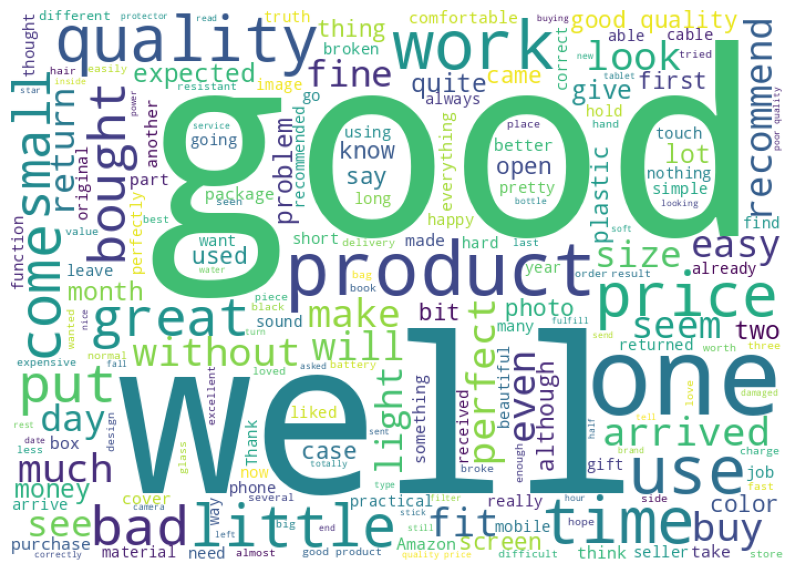

In [ ]:
# word cloud

def wordcloud(data,column):
  df_=data[column].str.cat(sep=" ")
  wordcloud = WordCloud(width=700,height = 500,background_color= "white").generate(df_)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(df,'translated_reviews')


In [ ]:
# for
#  print(end=" ")

In [ ]:
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords:     # kw  >>> (kw , score)
    keyword_list.append(kw[0])
  return keyword_list

keywords = df.translated_reviews.apply(yake_extractor)
keywords

0      [press the button, hearing every time, time yo...
1      [PHOTO, TRUE, FEEL, SLIPS, HANDS, HAND, SLIDE,...
2      [make sudden movements, works great, sudden mo...
3      [worth making diagnoses, read half, making dia...
4      [good purchase, price, correct measurement, sp...
                             ...                        
995    [print is fine, poor quality, fine, quality, w...
996    [good book, book, good, feasible and real, rea...
997    [opened the bottle, asked for tile-colored, su...
998            [meets expectations, meets, expectations]
999          [interesting article, article, interesting]
Name: translated_reviews, Length: 1000, dtype: object

In [ ]:
all_keywords = []
for kw in keywords:
  all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(500)

In [ ]:
cnt

[('good', 183),
 ('quality', 136),
 ('product', 104),
 ('price', 84),
 ('arrived', 59),
 ('time', 57),
 ('work', 52),
 ('bad', 50),
 ('works', 48),
 ('bought', 48),
 ('put', 47),
 ('fine', 46),
 ('great', 44),
 ('Good', 44),
 ('perfect', 44),
 ('small', 43),
 ('expected', 41),
 ('buy', 41),
 ('easy', 41),
 ('fit', 36),
 ('lot', 36),
 ('perfectly', 34),
 ('recommend', 34),
 ('size', 33),
 ('money', 33),
 ('light', 32),
 ('plastic', 29),
 ('good quality', 29),
 ('screen', 29),
 ('bit', 29),
 ('return', 28),
 ('purchase', 26),
 ('open', 26),
 ('days', 25),
 ('comfortable', 25),
 ('make', 24),
 ('case', 24),
 ('pretty', 24),
 ('months', 23),
 ('practical', 23),
 ('broken', 23),
 ('box', 23),
 ('problem', 21),
 ('fits', 21),
 ('thought', 20),
 ('returned', 20),
 ('Amazon', 20),
 ('job', 20),
 ('seller', 20),
 ('thing', 20),
 ('photo', 20),
 ('beautiful', 19),
 ('package', 19),
 ('hard', 19),
 ('made', 19),
 ('give', 19),
 ('original', 19),
 ('month', 18),
 ('loved', 18),
 ('recommended', 18

In [ ]:
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

rake_keywords = df.translated_reviews.apply(rake_extractor)

In [ ]:
rake_keywords

0      [keep hearing every time, sounds something, se...
1      [slide well, use, true, therefore, slips, sinc...
2      [place without moving unless, make sudden move...
3      [worth making diagnoses, read half, read half,...
4      [sporadic uses, good purchase, correct measure...
                             ...                        
995    [poor quality, work, shirt, recommend, print, ...
996    [remain mere theories, real strategies, good b...
997    [white silicone, colored silicone, tile, surpr...
998                                 [meets expectations]
999                                [interesting article]
Name: translated_reviews, Length: 1000, dtype: object

In [ ]:
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)

cnt = Counter(all_keywords).most_common(100)
cnt

[('good', 87),
 ('product', 82),
 ('use', 72),
 ('price', 64),
 ('well', 62),
 ('put', 58),
 ('like', 52),
 ('one', 52),
 ('quality', 50),
 ('recommend', 46),
 ('easy', 44),
 ('bought', 43),
 ('time', 42),
 ('fine', 39),
 ('return', 38),
 ('work', 38),
 ('lot', 38),
 ('buy', 37),
 ('perfect', 37),
 ('expected', 36),
 ('see', 35),
 ('good quality', 34),
 ('bad', 33),
 ('small', 32),
 ('great', 30),
 ('money', 30),
 ('although', 30),
 ('since', 29),
 ('comfortable', 28),
 ('arrived', 28),
 ('used', 27),
 ('know', 26),
 ('much', 25),
 ('would', 25),
 ('think', 25),
 ('returned', 24),
 ('make', 24),
 ('made', 24),
 ('light', 23),
 ('problem', 23),
 ('fit', 23),
 ('little', 23),
 ('screen', 22),
 ('comes', 22),
 ('case', 22),
 ('open', 22),
 ('size', 21),
 ('photo', 21),
 ('seems', 21),
 ('give', 21),
 ('thought', 21),
 ('come', 20),
 ('want', 19),
 ('truth', 19),
 ('liked', 19),
 ('able', 19),
 ('practical', 19),
 ('even', 18),
 ('going', 18),
 ('take', 17),
 ('purchase', 17),
 ('good prod